In [500]:
import requests
import pandas as pd
from itertools import cycle
from datetime import date 
import numpy as np
import random
import time
import collections
import warnings

In [537]:
df = pd.read_csv("C:/Users/LEGION/Downloads/Fundamental_Data_Final.csv", index_col = 0)
df

,Ticker,Company,Market Cap,Sector,Industry,Country,Fwd P/E,PEG,P/S,P/B,...,RSI,Scale (billion $),Labor Cost (billion $),Operating Leverage (DOL),C-Suite Diversity,Technological Enabler,ESG Score,Earnings,Price,Target Price
10,AAL,American Airlines Group Inc.,11.84B,Industrials,Airlines,USA,9.91,-,0.4,-,...,58.85,11.84,3.40,1.18,33,Industry 3.0,62.96,Jan 20/b,17.89,17.13
12,AAN,"The Aaron's Company, Inc.",666.84M,Industrials,Rental & Leasing Services,USA,7.74,-,0.36,0.92,...,46.15,0.67,0.16,1.00,28,Industry 4.0,54.21,Feb 23/a,21.00,29.67
14,AAON,"AAON, Inc.",2.90B,Industrials,Building Products & Equipment,USA,27.88,4.23,5.42,6.26,...,47.13,2.90,0.63,2.00,16,Industry 3.0,47.78,Feb 28/a,55.28,71
21,AAWW,"Atlas Air Worldwide Holdings, Inc.",2.51B,Industrials,Airports & Air Services,USA,6,0.51,0.62,0.85,...,30.94,2.51,0.68,0.54,24,Industry 4.0,59.58,Feb 17/b,75.10,106.43
24,ABB,ABB Ltd,67.22B,Industrials,Specialty Industrial Machinery,Switzerland,18.85,0.98,2.32,4.17,...,41.35,67.22,16.61,3.17,33,Industry 3.0,54.16,Apr 21/b,32.47,40.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,ZEV,"Lightning eMotors, Inc.",436.12M,Industrials,Farm & Heavy Construction Machinery,USA,-,-,20.77,188.33,...,46.61,0.44,0.10,3.90,29,Industry 3.0,48.80,Mar 28/a,5.34,11.07
8302,ZIM,ZIM Integrated Shipping Services Ltd.,8.20B,Industrials,Marine Shipping,Israel,5.23,-,0.76,1.75,...,35.67,8.20,2.96,2.10,43,Industry 4.0,79.10,Mar 09/b,62.90,89.86
8306,ZIP,"ZIPRECRUITER, INC.",2.88B,Industrials,Staffing & Employment Services,USA,106.74,-,3.89,12.27,...,58.67,2.88,0.69,2.50,32,Industry 3.0,52.61,Mar 01/a,23.66,35.4
8313,ZNH,China Southern Airlines Company Limited,15.09B,Industrials,Airlines,China,-,-,0.94,0.8,...,46.24,15.09,3.64,1.50,22,Industry 4.0,52.93,-,29.17,-


In [538]:
df.columns

Index(['Ticker', 'Company', 'Market Cap', 'Sector', 'Industry', 'Country',
       'Fwd P/E', 'PEG', 'P/S', 'P/B', 'P/C', 'P/FCF', 'Dividend',
       'Payout Ratio', 'EPS this Y', 'EPS next Y', 'EPS past 5Y',
       'EPS next 5Y', 'Sales past 5Y', 'EPS Q/Q', 'Sales Q/Q', 'Insider Own',
       'Insider Trans', 'Inst Own', 'Inst Trans', 'Short Ratio', 'ROA', 'ROE',
       'ROI', 'Curr R', 'Quick R', 'LTDebt/Eq', 'Debt/Eq', 'Gross M', 'Oper M',
       'Profit M', 'Perf Month', 'Perf Quart', 'Perf Half', 'Perf Year',
       'Perf YTD', 'Volatility M', 'SMA20', 'SMA50', 'SMA200', '52W High',
       '52W Low', 'RSI', 'Scale (billion $)', 'Labor Cost (billion $)',
       'Operating Leverage (DOL)', 'C-Suite Diversity',
       'Technological Enabler', 'ESG Score', 'Earnings', 'Price',
       'Target Price'],
      dtype='object')

In [539]:
sector_data = collections.defaultdict(lambda : collections.defaultdict(dict))
sector_data

defaultdict(<function __main__.<lambda>()>, {})

In [540]:
def remove_outliers(S, std):    
    s1 = S[~((S-S.mean()).abs() > std * S.std())]
    return s1[~((s1-s1.mean()).abs() > std * s1.std())]

In [543]:
sectors = df['Sector'].unique()
metrics = df.columns[6: -9]


for sector in sectors:
    rows = df.loc[df['Sector'] == sector]
    for metric in metrics:
        rows[metric] = rows[metric].astype(str).str.rstrip('%')
        rows[metric] = pd.to_numeric(rows[metric], errors='coerce')
        data = remove_outliers(rows[metric], 2)
        
        sector_data[sector][metric]['Median'] = data.median(skipna=True)
        sector_data[sector][metric]['10Pct'] = data.quantile(0.1)
        sector_data[sector][metric]['90Pct'] = data.quantile(0.9)
        sector_data[sector][metric]['Std'] = np.std(data, axis=0) / 5

In [544]:
sectors = df['Sector'].unique()
metrics = df.columns[-9:-3]


for sector in sectors:
    rows = df.loc[df['Sector'] == sector]
    for metric in metrics:
        rows[metric] = pd.to_numeric(rows[metric], errors='coerce')
        data = remove_outliers(rows[metric], 2)
        
        sector_data[sector][metric]['Median'] = data.median(skipna=True)
        sector_data[sector][metric]['10Pct'] = data.quantile(0.1)
        sector_data[sector][metric]['90Pct'] = data.quantile(0.9)
        sector_data[sector][metric]['Std'] = np.std(data, axis=0) / 5

c:\Projects\Automated-Fundamental-Analysis-master\btp\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [545]:
sector_data

defaultdict(<function __main__.<lambda>()>,
            {'Industrials': defaultdict(dict,
                         {'Fwd P/E': {'Median': 14.3,
                           '10Pct': 6.396,
                           '90Pct': 26.346999999999994,
                           'Std': 1.6472647731939105},
                          'PEG': {'Median': 1.87,
                           '10Pct': 0.47700000000000004,
                           '90Pct': 4.602,
                           'Std': 0.49000479706288697},
                          'P/S': {'Median': 1.475,
                           '10Pct': 0.35,
                           '90Pct': 6.498999999999997,
                           'Std': 2.4252270093770525},
                          'P/B': {'Median': 2.1900000000000004,
                           '10Pct': 0.8,
                           '90Pct': 5.936,
                           'Std': 0.41499766672729504},
                          'P/C': {'Median': 10.385000000000002,
                         

In [546]:
data_to_add = collections.defaultdict(list)
data_to_add

defaultdict(list, {})

In [547]:
def get_metric_grade(sector, metric_name, metric_val):
    lessThan = metric_name in ['Fwd P/E', 'PEG', 'P/S', 'P/B', 'P/FCF', 'Volatility M']
    grade_basis = '10Pct' if lessThan else '90Pct'
    start, change = sector_data[sector][metric_name][grade_basis], sector_data[sector][metric_name]['Std']
    
    grade_map = {'A+': 0, 'A': change, 'A-' : change * 2, 'B+' : change * 3, 'B' : change * 4, 
                 'B-' : change * 5, 'C+' : change * 6, 'C' : change * 7, 'C-' : change * 8, 
                 'D+' : change * 9, 'D' : change * 10, 'D-' : change * 11, 'F' : change * 12
            }
    
    for grade, val in grade_map.items():
        comparison = start + val if lessThan else start - val
        if lessThan and metric_val < comparison:
            return grade
        if lessThan == False and metric_val > comparison:
            return grade
    return 'C'

In [548]:
def get_metric_val(ticker, metric_name):
    try:
        return float(str(df.loc[df['Ticker'] == ticker][metric_name].values[0]).rstrip("%"))
    except:
        return 0

In [549]:
grading_metrics = {'Valuation' : ['Fwd P/E', 'PEG', 'P/S', 'P/B', 'P/FCF'],
                    'Profitability' : ['Profit M', 'Oper M', 'Gross M', 'ROE', 'ROA'],
                    'Growth' : ['EPS this Y', 'EPS next Y', 'EPS next 5Y', 'Sales Q/Q', 'EPS Q/Q'],
                    'Performance' : ['Perf Month', 'Perf Quart', 'Perf Half', 'Perf Year', 'Perf YTD', 'Volatility M'],
                    'KPI' : ['Scale (billion $)', 'Labor Cost (billion $)', 'Operating Leverage (DOL)', 'C-Suite Diversity', 'Technological Enabler', 'ESG Score']
                }

grade_scores = {'A+' : 4.3, 'A' : 4.0, 'A-' : 3.7, 'B+' : 3.3, 'B' : 3.0, 'B-' : 2.7, 
                'C+' : 2.3, 'C' : 2.0, 'C-' : 1.7, 'D+' : 1.3, 'D' : 1.0, 'D-' : 0.7, 'F' : 0.0
            }

def get_category_grades(ticker, sector):
    category_grades = {}
    for category in grading_metrics:
        metric_grades = []
        for metric_name in grading_metrics[category]:
            metric_grades.append(get_metric_grade(sector, metric_name, get_metric_val(ticker, metric_name)))
        category_grades[category] = metric_grades
        
    for category in category_grades:
        score = 0
        for grade in category_grades[category]:
            score += grade_scores[grade]
        category_grades[category].append(round(score / len(category_grades[category]), 2))
    return category_grades

In [550]:
def get_stock_rating(category_grades):
    score = 0
    for category in category_grades:
        score += category_grades[category][-1]
    return round(score * 6.2, 2)

In [551]:
def convert_to_letter_grade(val):
    for grade in grade_scores:
        if val >= grade_scores[grade]:
            return grade

In [552]:
for row in df.iterrows():
    ticker, sector = row[1]['Ticker'], row[1]['Sector']
    category_grades = get_category_grades(ticker, sector)
    stock_rating = get_stock_rating(category_grades)
    
    data_to_add['Overall Rating'].append(stock_rating)
    data_to_add['Valuation Grade'].append(convert_to_letter_grade(category_grades['Valuation'][-1]))
    data_to_add['Profitability Grade'].append(convert_to_letter_grade(category_grades['Profitability'][-1]))
    data_to_add['Growth Grade'].append(convert_to_letter_grade(category_grades['Growth'][-1]))
    data_to_add['Performance Grade'].append(convert_to_letter_grade(category_grades['Performance'][-1]))
    data_to_add['KPI Grade'].append(convert_to_letter_grade(category_grades['KPI'][-1]))

In [553]:
df['Overall Rating'] = data_to_add['Overall Rating']
df['Valuation Grade'] = data_to_add['Valuation Grade']
df['Profitability Grade'] = data_to_add['Profitability Grade']
df['Growth Grade'] = data_to_add['Growth Grade']
df['Performance Grade'] = data_to_add['Performance Grade']    
df['KPI Grade'] = data_to_add['KPI Grade']
# df['Percent Diff'] = (pd.to_numeric(df['Target Price'], errors='coerce') - pd.to_numeric(df['Price'], errors='coerce')) / pd.to_numeric(df['Price'], errors='coerce') * 100

In [554]:
df.head()

,Ticker,Company,Market Cap,Sector,Industry,Country,Fwd P/E,PEG,P/S,P/B,...,ESG Score,Earnings,Price,Target Price,Overall Rating,Valuation Grade,Profitability Grade,Growth Grade,Performance Grade,KPI Grade
10,AAL,American Airlines Group Inc.,11.84B,Industrials,Airlines,USA,9.91,-,0.4,-,...,62.96,Jan 20/b,17.89,17.13,94.67,A,C+,B,C,B+
12,AAN,"The Aaron's Company, Inc.",666.84M,Industrials,Rental & Leasing Services,USA,7.74,-,0.36,0.92,...,54.21,Feb 23/a,21.00,29.67,74.34,A-,B-,C+,D,C-
14,AAON,"AAON, Inc.",2.90B,Industrials,Building Products & Equipment,USA,27.88,4.23,5.42,6.26,...,47.78,Feb 28/a,55.28,71,66.59,C+,C+,D+,C,C-
21,AAWW,"Atlas Air Worldwide Holdings, Inc.",2.51B,Industrials,Airports & Air Services,USA,6,0.51,0.62,0.85,...,59.58,Feb 17/b,75.10,106.43,82.71,A,B+,D,C,C
24,ABB,ABB Ltd,67.22B,Industrials,Specialty Industrial Machinery,Switzerland,18.85,0.98,2.32,4.17,...,54.16,Apr 21/b,32.47,40.02,83.51,C+,B+,D+,C+,B+


In [555]:
df["Overall Rating"] = df["Overall Rating"] * 100 / df["Overall Rating"].max()

In [556]:
maxRating = df["Overall Rating"].max()
maxRating

100.0

In [557]:
minRating = df["Overall Rating"].min()
minRating

49.43366406181403

In [558]:
meanRating = df["Overall Rating"].mean()
meanRating

67.28248826935432

In [559]:
minDiff = 100
answerTicker = ""
for row in df.iterrows():
    ticker, overallRating = row[1]['Ticker'], row[1]['Overall Rating']
    currDiff = abs(overallRating - meanRating)
    if (currDiff < minDiff):
        minDiff = currDiff
        answerTicker = ticker

df.loc[df["Ticker"] == answerTicker]

,Ticker,Company,Market Cap,Sector,Industry,Country,Fwd P/E,PEG,P/S,P/B,...,ESG Score,Earnings,Price,Target Price,Overall Rating,Valuation Grade,Profitability Grade,Growth Grade,Performance Grade,KPI Grade
8004,WCC,"WESCO International, Inc.",6.47B,Industrials,Industrial Distribution,USA,9.73,1.65,0.36,1.73,...,53.84,Feb 15/b,129.14,157.73,67.284222,B,D+,C,B,C+


In [560]:
df.loc[df["Overall Rating"] == maxRating]

,Ticker,Company,Market Cap,Sector,Industry,Country,Fwd P/E,PEG,P/S,P/B,...,ESG Score,Earnings,Price,Target Price,Overall Rating,Valuation Grade,Profitability Grade,Growth Grade,Performance Grade,KPI Grade
5204,NMM,Navios Maritime Partners L.P.,1.04B,Industrials,Marine Shipping,Monaco,1.99,0.05,1.45,0.58,...,83.39,Feb 17/b,32.1,45,100.0,A,A+,B+,B+,B-


In [561]:
df.loc[df["Overall Rating"] == minRating]

,Ticker,Company,Market Cap,Sector,Industry,Country,Fwd P/E,PEG,P/S,P/B,...,ESG Score,Earnings,Price,Target Price,Overall Rating,Valuation Grade,Profitability Grade,Growth Grade,Performance Grade,KPI Grade
3230,GRC,The Gorman-Rupp Company,929.19M,Industrials,Specialty Industrial Machinery,USA,19.8,2.11,2.46,2.87,...,42.42,-,35.77,46,49.433664,C,C,C-,C-,D


In [562]:
df["Overall Rating"].mean()

67.28248826935432

In [563]:
df_or = df.groupby(by = "Industry").mean()
df_or["Overall Rating"]

Industry
Aerospace & Defense                    65.519644
Airlines                               73.594697
Airports & Air Services                73.597331
Building Products & Equipment          67.300452
Business Equipment & Supplies          59.958858
Conglomerates                          62.572072
Consulting Services                    68.187505
Electrical Equipment & Parts           65.205900
Engineering & Construction             64.099187
Farm & Heavy Construction Machinery    64.932700
Industrial Distribution                66.179537
Infrastructure Operations              53.727281
Integrated Freight & Logistics         68.101348
Marine Shipping                        83.668452
Metal Fabrication                      67.629950
Pollution & Treatment Controls         63.066493
Railroads                              72.164529
Rental & Leasing Services              73.416760
Security & Protection Services         63.928001
Specialty Business Services            65.144730
Specialty I

c:\Projects\Automated-Fundamental-Analysis-master\btp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

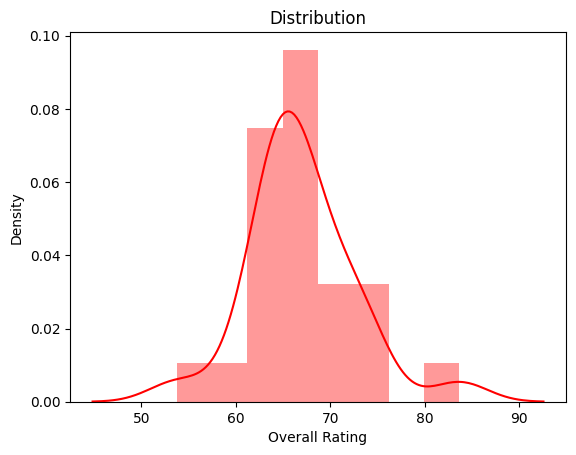

In [564]:
# Industry vs Sector


import seaborn as sns
import matplotlib.pyplot as plt
#set distribution plot, title and labels
ax = sns.distplot(df_or["Overall Rating"], hist=True, color="r")
plt.title("Distribution") 
plt.ylabel("Density")

c:\Projects\Automated-Fundamental-Analysis-master\btp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

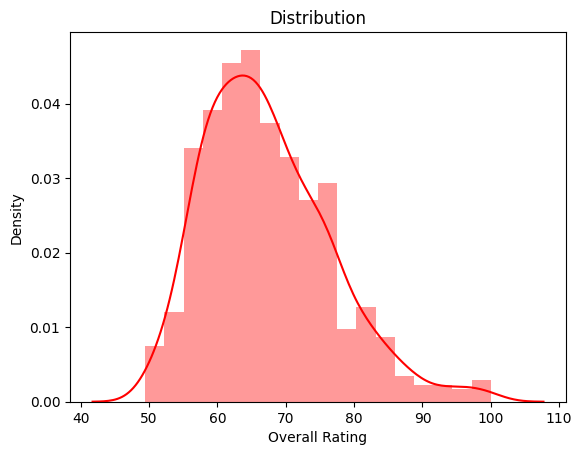

In [535]:
# Company vs Sector



#set distribution plot, title and labels
ax = sns.distplot(df["Overall Rating"], hist=True, color="r")
plt.title("Distribution") 
plt.ylabel("Density")

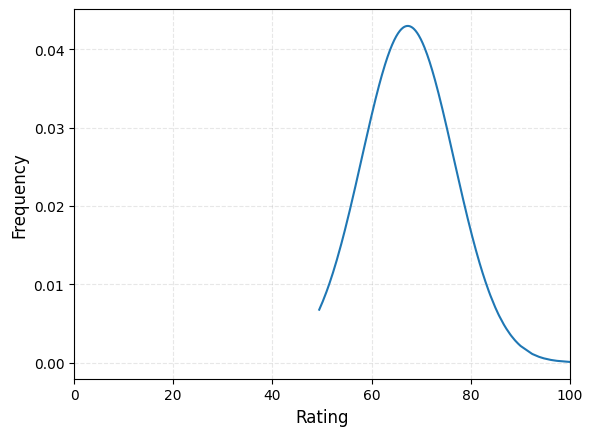

In [565]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Generating data frame
# x = np.random.normal(50, 3, 1000)
# source = {"Genotype": ["CV1"]*1000, "AGW": x}
# df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df["Overall Rating"])
df_std = np.std(df["Overall Rating"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["Overall Rating"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["Overall Rating"].sort_values(), pdf)
# plt.plot(df_mean)
plt.xlim([0,100])  
plt.xlabel("Rating", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.show()


Text(0, 0.5, 'Density')

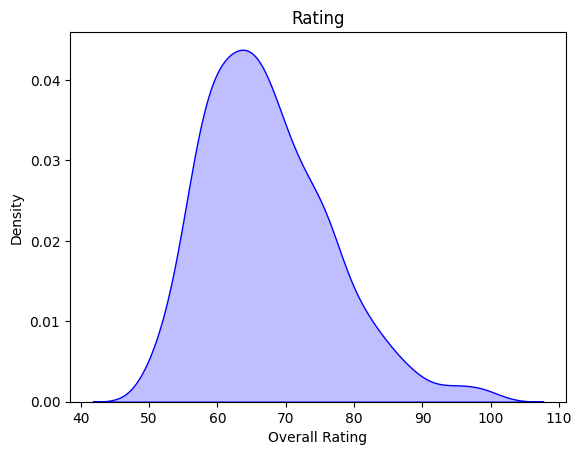

In [566]:
import seaborn as sns
ax = sns.kdeplot(df["Overall Rating"], shade=True, color="b") 
plt.title("Rating") 
plt.ylabel("Density")

Text(0, 0.5, 'Density')

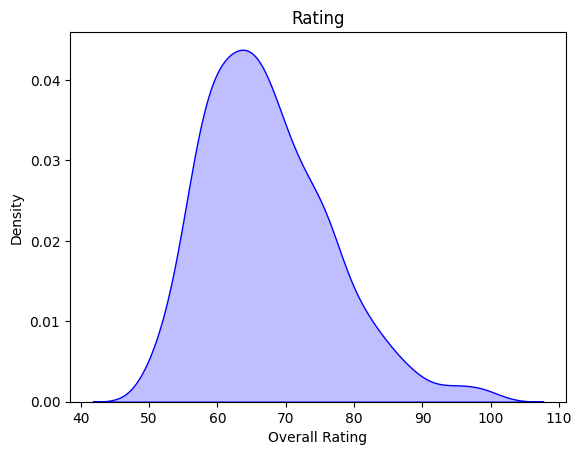

In [567]:
import seaborn as sns
ax = sns.kdeplot(df["Overall Rating"], shade=True, color="b") 
plt.title("Rating") 
plt.ylabel("Density")

c:\Projects\Automated-Fundamental-Analysis-master\btp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

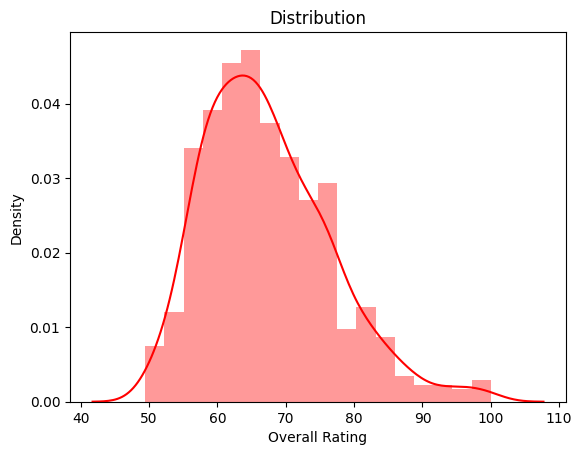

In [568]:
#set distribution plot, title and labels
ax = sns.distplot(df["Overall Rating"], hist=True, color="r")
plt.title("Distribution") 
plt.ylabel("Density")

c:\Projects\Automated-Fundamental-Analysis-master\btp\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Rating')

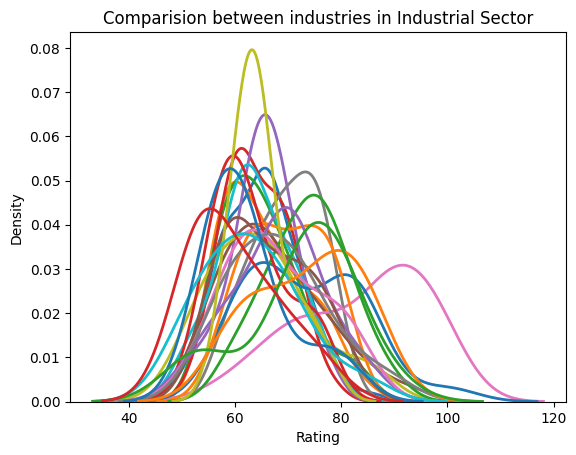

In [569]:
industries = df["Industry"].value_counts().index.tolist() 
# set kde plot for each continent 
for c in industries: 
   subset = df[df["Industry"] == c]
   sns.kdeplot(subset["Overall Rating"], label=c, linewidth=2) 
# set title, x and y labels 
plt.title("Comparision between industries in Industrial Sector") 
# plt.legend(labels=industries)
plt.ylabel("Density") 
plt.xlabel("Rating")